In [7]:
import pandas as pd




We found the school, station coordinates from internet.

We mannully make a file of shopping mall..

So we first calculate the distance of the closest train station, closest shopping center and closest school, and we also map the property into SA2 district.

In [8]:
properties_with_closest_shopping_centers_path = '../data/curated/properties_with_closest_shopping_centers.csv'
properties_with_closest_shopping_centers = pd.read_csv(properties_with_closest_shopping_centers_path)
properties_with_closest_shopping_centers.head(10)


,Property Name,Property Latitude,Property Longitude,Closest Station,Distance (km),cost_text,Closest School,School Distance (km),SA2_NAME21,Closest Shopping Center,Distance to Closest Shopping Center (km)
0,"6/137 Coppin St, Richmond VIC 3121",-37.820283,145.003572,East Richmond,0.882026,$425 weekly,Richmond High School,0.326233,Richmond (South) - Cremorne,Northland Shopping Centre,9.543373
1,"205/6 Joseph Road, Footscray VIC 3011",-37.798238,144.914181,South Kensington,0.990486,$510 per week,St Monica's School,0.723669,Footscray,Highpoint Shopping Centre,3.431348
2,"8/7 Docker St, Richmond VIC 3121",-37.823681,144.997096,East Richmond,0.308573,$425 weekly,Richmond Primary School,0.676342,Richmond (South) - Cremorne,Northland Shopping Centre,10.037550
3,"8/51 Kooyong Road, Armadale VIC 3143",-37.862342,145.019539,Armadale,0.658460,$375 per week,The King David School,0.917637,Armadale,Chadstone Shopping Centre,6.446263
4,"10/54 Rockley Road, South Yarra VIC 3141",-37.835164,145.000360,South Yarra,0.785119,$475 pw,Kamaruka,0.360197,South Yarra - North,Chadstone Shopping Centre,9.419477
5,"4/24 Brisbane Street, Murrumbeena VIC 3163",-37.885893,145.069142,Murrumbeena,0.509253,$380 weekly,Murrumbeena Primary School,0.115611,Murrumbeena,Chadstone Shopping Centre,1.574053
6,"106/52 Darling Street, South Yarra VIC 3141",-37.833630,144.991076,South Yarra,0.522136,$525 pw,Melbourne High School,0.514997,South Yarra - North,Chadstone Shopping Centre,10.186518
7,"1508/2 Joseph Road, Footscray VIC 3011",-37.798991,144.910753,Footscray,0.750591,$500per week,St Monica's School,0.420729,Footscray,Highpoint Shopping Centre,3.321985
8,"12/63 Alexandra Avenue, South Yarra VIC 3141",-37.834286,144.994412,South Yarra,0.475469,$700.00,Melbourne High School,0.293165,South Yarra - North,Chadstone Shopping Centre,9.903024
9,"29/4 Wando Grove, St Kilda East VIC 3183",-37.860826,145.008392,Armadale,1.081804,$330 per week,The King David School,0.342788,St Kilda East,Chadstone Shopping Centre,7.418464


We grouped the data and calculate the average distance of every features, and median price for each suburb.

In [11]:

grouped_avg_properties_path = '../data/curated/grouped_avg_properties_sa2.csv'


grouped_avg_properties = pd.read_csv(grouped_avg_properties_path)

grouped_avg_properties.head(10)


,SA2_NAME21,Distance (km),School Distance (km),Distance to Closest Shopping Center (km),Price
0,Abbotsford,0.749009,0.466914,8.159577,680.0
1,Airport West,3.646777,0.495533,5.746322,830.0
2,Albert Park,2.291446,0.391343,10.058623,797.5
3,Alfredton,3.456293,0.877199,87.816964,475.0
4,Alphington - Fairfield,0.322991,0.496736,4.718248,545.0
5,Altona,0.602537,0.513213,11.153748,862.5
6,Altona Meadows,2.164400,0.718317,7.471010,550.0
7,Altona North,2.633912,0.686030,7.298112,735.0
8,Ararat,0.564885,0.346323,168.419598,395.0
9,Ararat Surrounds,10.480487,6.254229,176.629839,550.0


Normalize the distance and try to find the most livable district.

In [18]:
import pandas as pd

grouped_avg_properties_path = '../data/curated/grouped_avg_properties_sa2.csv'
grouped_avg_properties_df = pd.read_csv(grouped_avg_properties_path)

grouped_avg_properties_df['Normalized School Distance'] = grouped_avg_properties_df['School Distance (km)'] / grouped_avg_properties_df['School Distance (km)'].max()
grouped_avg_properties_df['Normalized Shopping Center Distance'] = grouped_avg_properties_df['Distance to Closest Shopping Center (km)'] / grouped_avg_properties_df['Distance to Closest Shopping Center (km)'].max()
grouped_avg_properties_df['Normalized Station Distance'] = grouped_avg_properties_df['Distance (km)'] / grouped_avg_properties_df['Distance (km)'].max()

grouped_avg_properties_df['Combined Score'] = (
    grouped_avg_properties_df['Normalized School Distance'] +
    grouped_avg_properties_df['Normalized Shopping Center Distance'] +
    grouped_avg_properties_df['Normalized Station Distance']
)

top_10_best_to_live_df = grouped_avg_properties_df.nsmallest(10, 'Combined Score')

top_10_best_to_live_df.head


<bound method NDFrame.head of                        SA2_NAME21  Distance (km)  School Distance (km)  \
306     Port Melbourne Industrial       1.321554              0.063019   
94                  Coburg - East       0.734908              0.183706   
199                       Ivanhoe       0.964595              0.227143   
16               Avondale Heights       3.393328              0.110408   
310                Preston - East       0.865869              0.302633   
156                    Flemington       0.529342              0.285744   
197                    Hughesdale       0.604184              0.331640   
147  Essendon (West) - Aberfeldie       1.790294              0.267583   
148               Essendon - East       0.443235              0.327017   
98                    Collingwood       0.696694              0.225951   

     Distance to Closest Shopping Center (km)   Price  \
306                                  8.140766   900.0   
94                                   4.85

We clean the historical dataset and calculate every quarter increase rate. 

In [9]:
increase_rates_path = '../data/curated/increase_rates.csv'
expanded_cleaned_properties_path = '../data/curated/expanded_cleaned_properties.csv'

expanded_cleaned_properties = pd.read_csv(expanded_cleaned_properties_path)
increase_rates = pd.read_csv(increase_rates_path)

expanded_cleaned_properties.head(10), increase_rates.head(10)


(   Mar 2022 Median Rent  Jun 2022 Median Rent  Sep 2022 Median Rent  \
 0                 500.0                 515.0                 500.0   
 1                 500.0                 515.0                 500.0   
 2                 500.0                 515.0                 500.0   
 3                 430.0                 450.0                 450.0   
 4                 580.0                 595.0                 600.0   
 5                 310.0                 319.0                 340.0   
 6                 310.0                 319.0                 340.0   
 7                 365.0                 390.0                 419.0   
 8                 365.0                 390.0                 419.0   
 9                 430.0                 450.0                 480.0   
 
    Dec 2022 Median Rent  Mar 2023 Median Rent  Mar 2017 Median Rent  \
 0                 525.0                 545.0                 500.0   
 1                 525.0                 545.0                

We use the linear regression model to predict next three years rental price.

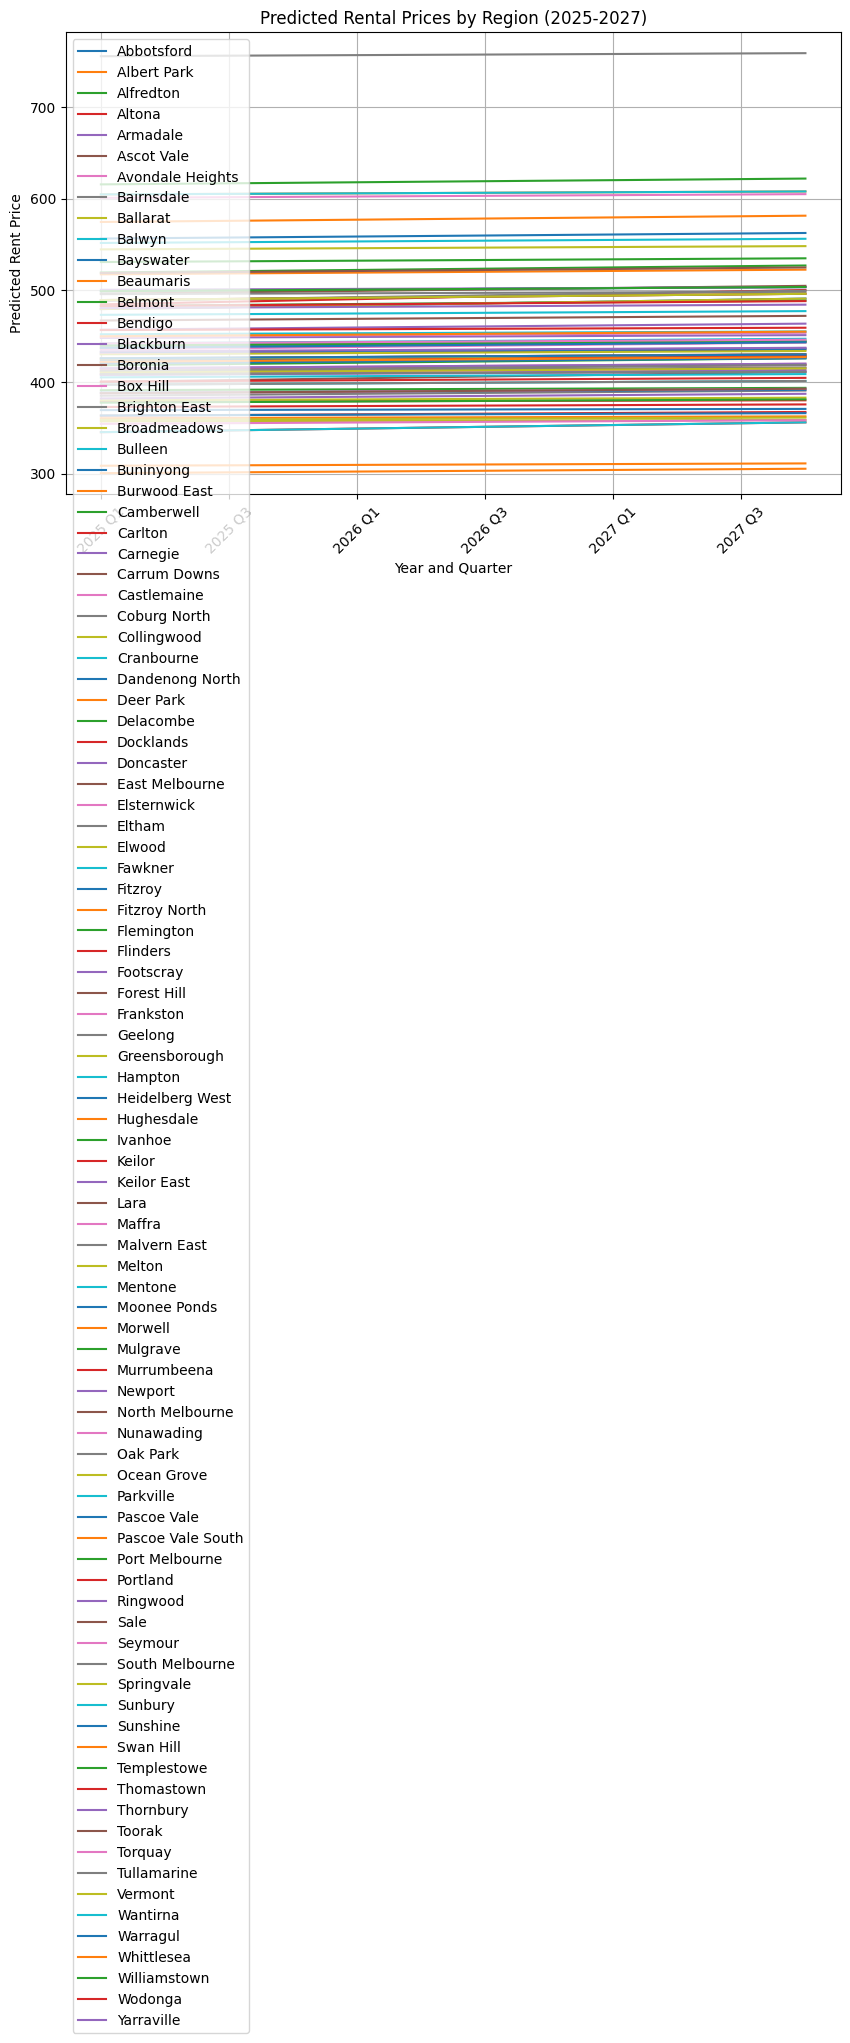

In [12]:
import matplotlib.pyplot as plt

model_predictions_path = '../data/curated/model_lr_distances.csv'
model_predictions_df = pd.read_csv(model_predictions_path, index_col=0)

plt.figure(figsize=(10, 6))
model_predictions_df.plot(ax=plt.gca())
plt.title('Predicted Rental Prices by Region (2025-2027)')
plt.xlabel('Year and Quarter')
plt.ylabel('Predicted Rent Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper left')
plt.show()
